# 05 - lab 15 - Drgania masy zawieszonej na sprężynie


In [72]:
import numpy as np
from IPython.display import display, Math

In [73]:
m = np.array([10, 20, 30, 40, 50, 60])
x1 = np.array([21.0, 28.2, 35.4, 42.6, 50.0, 57.1])
x2 = np.array([21.0, 28.2, 35.5, 42.8, 50.0, 57.1])

x1 = x1 / 100
x2 = x2 / 100

m = m / 1000
print(m)

x_0 = 13.6 / 100


t = np.array([31.44, 31.16, 31.28, 31.34, 31.66])

[0.01 0.02 0.03 0.04 0.05 0.06]


In [74]:
D_x1 = x1 - x_0
D_x2 = x2 - x_0

print(D_x1)
print(D_x2)

D_x_avg = (D_x1 + D_x2) / 2
print(D_x_avg)

F = m * 9.81
print(F)

[0.074 0.146 0.218 0.29  0.364 0.435]
[0.074 0.146 0.219 0.292 0.364 0.435]
[0.074  0.146  0.2185 0.291  0.364  0.435 ]
[0.0981 0.1962 0.2943 0.3924 0.4905 0.5886]


$$
F = k \cdot x
$$


In [94]:
from scipy import stats

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(F, D_x_avg)

# Calculate spring constant k (in N/m)
k = 1 / slope

print(f"Spring constant k = {k:.4f} N/m")

print(f"Slope = {slope:.5f} m/N")
print(f"Intercept = {intercept:.5f} m")
print(f"R-squared value = {r_value**2:.4f}")

Spring constant k = 1.3563 N/m
Slope = 0.73729 m/N
Intercept = 0.00160 m
R-squared value = 1.0000


In [95]:
k = 1 / slope
print(f"k={k}")

k=1.3563104878530512


## Niepewności


### Niepewności współczynników regresji liniowej


In [96]:
# Obliczanie niepewności dla współczynników
n = len(F)
y_pred = slope * F + intercept
s_y = np.sqrt(np.sum((D_x_avg - y_pred) ** 2) / (n - 2))

# Obliczanie niepewności standardowych dla k i b
u_a = s_y * np.sqrt(n / (n * np.sum(F**2) - np.sum(F) ** 2))
u_b = s_y * np.sqrt(np.sum(F**2) / (n * np.sum(F**2) - np.sum(F) ** 2))

display(Math(r"u_a = " + f"{u_a:.6f}"))
display(Math(r"u_b = " + f"{u_b:.6f}"))

print(f"u_a = {u_a:.6f}")
print(f"u_b = {u_b:.6f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

u_a = 0.001210
u_b = 0.000462


### Niepewność k


In [97]:
u_k = 1 / slope**2 * u_a
print(f"u_k = {u_k:.6f}")

u_k = 0.002225


### Niepewność wydłużenia

$$
\Delta_d(x) = 0.001
$$

$$
u_B(x) = \frac{\Delta_d x}{\sqrt{3}}
$$


In [77]:
Delta_x = 0.001
u_x = Delta_x / np.sqrt(3)
print(u_x)

0.0005773502691896258


In [78]:
u_Delta_x = np.sqrt(2) * u_x
print(u_Delta_x)

0.0008164965809277262


In [79]:
u_Delta_x_avg = u_Delta_x / np.sqrt(2)
print(u_Delta_x_avg)

0.0005773502691896258


## niepewność pomiaru czasu


In [80]:
Delta_t = 0.2
u_B_t = Delta_t / np.sqrt(3)
print(f"u_B_t = {u_B_t}")

u_A_t = np.std(t, ddof=1)
print(f"u_A_t = {u_A_t}")

u_c_t = np.sqrt(u_A_t**2 + u_B_t**2)
print(f"u_c_t = {u_c_t}")

u_B_t = 0.11547005383792516
u_A_t = 0.18836135484753766
u_c_t = 0.2209373968646624


### Niepewność okresu

$$
u_c(T) = \frac{u_c(t)}{N}
$$


In [81]:
N = 20
u_c_T = u_c_t / N
print(f"u_c_T = {u_c_T}")

u_c_T = 0.01104686984323312


## Wykres


0.7372943061016455
0.0015999999999999214


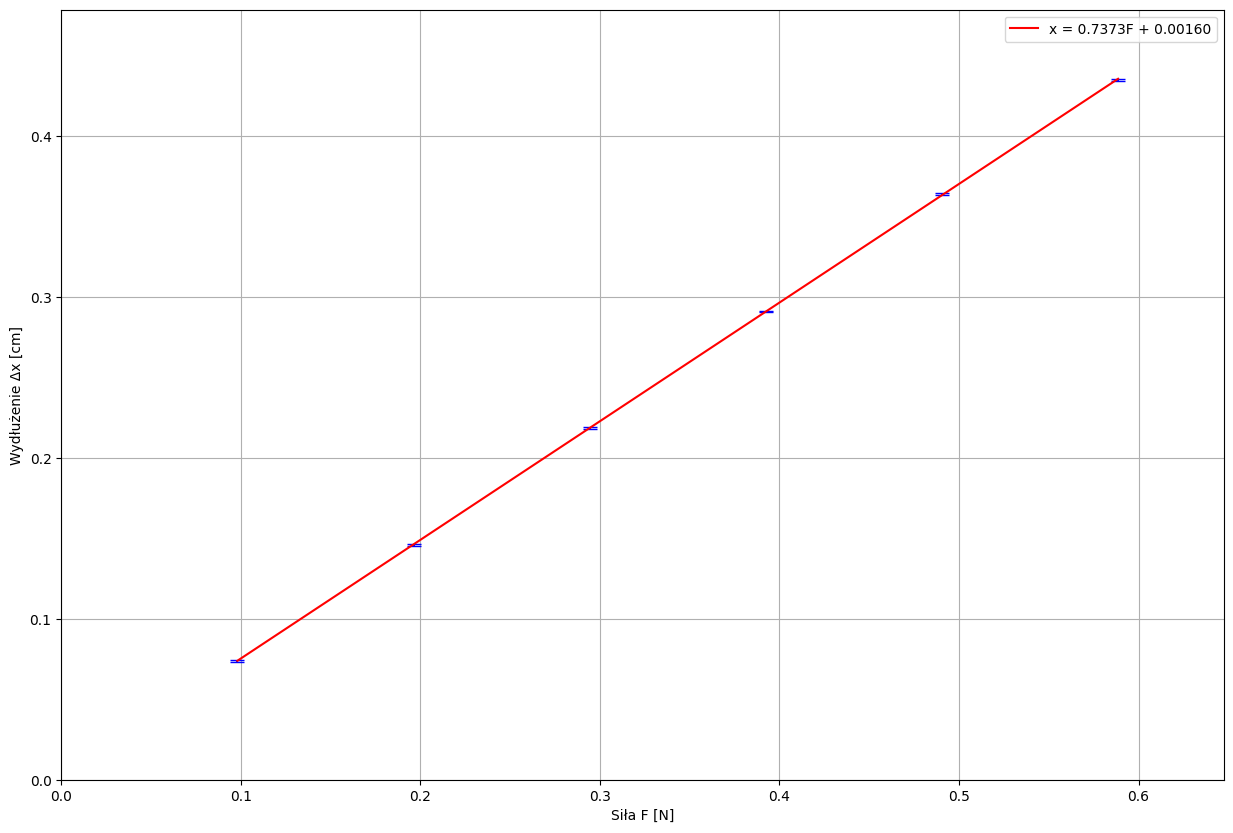

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
plt.errorbar(
    F, D_x_avg, yerr=u_Delta_x_avg, fmt="none", color="blue", capsize=5
)  # Add error bars

# Calculate linear regression
slope, intercept = np.polyfit(F, D_x_avg, 1)
regression_line = slope * F + intercept

print(slope)
print(intercept)

# Plot regression line
plt.plot(F, regression_line, "r-", label=f"x = {slope:.4f}F + {intercept:.5f}")

plt.xlabel("Siła F [N]")
plt.ylabel("Wydłużenie Δx [cm]")
plt.grid(True)
plt.xlim(0, max(F) * 1.1)  # Start x-axis from 0 with 10% margin
plt.ylim(0, max(D_x_avg) * 1.1)  # Start y-axis from 0 with 10% margin
plt.legend()
plt.show()

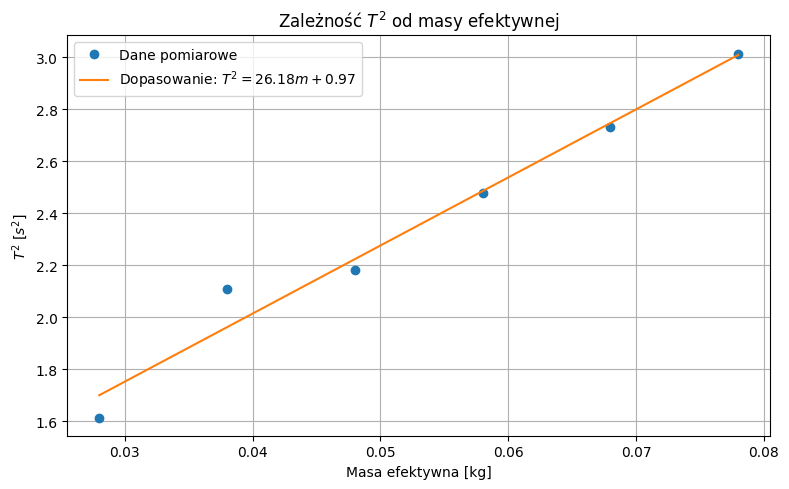

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
masa_efektywna = np.array([0.028, 0.038, 0.048, 0.058, 0.068, 0.078])  # w kg
T2 = np.array([1.6142, 2.1096, 2.1800, 2.4759, 2.7324, 3.0137])  # w s^2

# Regresja liniowa
a, b = np.polyfit(masa_efektywna, T2, 1)
T2_fit = a * masa_efektywna + b

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(masa_efektywna, T2, "o", label="Dane pomiarowe")
plt.plot(masa_efektywna, T2_fit, "-", label=f"Dopasowanie: $T^2 = {a:.2f}m + {b:.2f}$")

# Opis osi i tytuł
plt.xlabel("Masa efektywna [kg]")
plt.ylabel("$T^2$ [$s^2$]")
plt.title("Zależność $T^2$ od masy efektywnej")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

[0.05 0.06 0.07 0.08 0.09 0.1 ]
[1.281 1.394 1.481 1.559 1.66  1.784]
[1.640961 1.943236 2.193361 2.430481 2.7556   3.182656]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

u_a = 1.543358
u_b = 0.118715


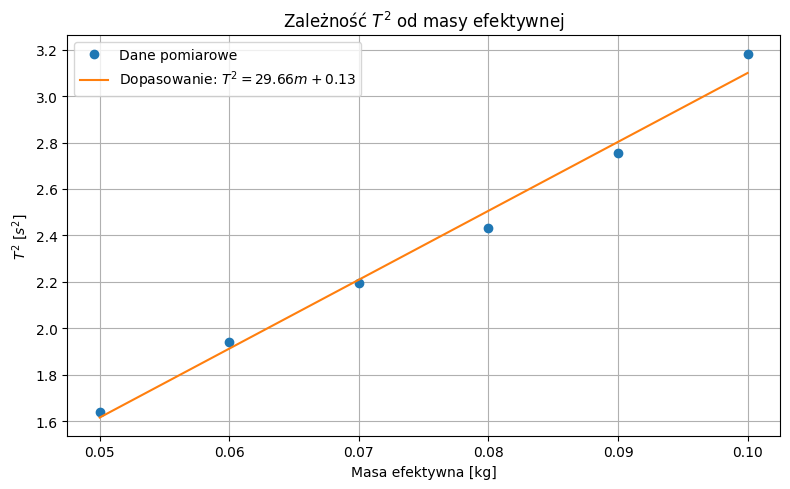

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Dane
# masa_efektywna = np.array([0.028, 0.038, 0.048, 0.058, 0.068, 0.078])  # w kg
m_szalka = 0.040

masa_efektywna = m + m_szalka
print(masa_efektywna)

t = np.array([12.81, 13.94, 14.81, 15.59, 16.60, 17.84])

T = t / 10
print(T)

T2 = T**2

print(T2)

# Regresja liniowa
a, b = np.polyfit(masa_efektywna, T2, 1)
T2_fit = a * masa_efektywna + b

# Obliczanie niepewności dla współczynników
n = len(masa_efektywna)
y_pred = a * masa_efektywna + b
s_y = np.sqrt(np.sum((T2 - y_pred) ** 2) / (n - 2))

# Obliczanie niepewności standardowych dla a i b
u_a = s_y * np.sqrt(n / (n * np.sum(masa_efektywna**2) - np.sum(masa_efektywna) ** 2))
u_b = s_y * np.sqrt(
    np.sum(masa_efektywna**2)
    / (n * np.sum(masa_efektywna**2) - np.sum(masa_efektywna) ** 2)
)

display(Math(r"u_a = " + f"{u_a:.6f}"))
display(Math(r"u_b = " + f"{u_b:.6f}"))

print(f"u_a = {u_a:.6f}")
print(f"u_b = {u_b:.6f}")

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(masa_efektywna, T2, "o", label="Dane pomiarowe")
plt.plot(masa_efektywna, T2_fit, "-", label=f"Dopasowanie: $T^2 = {a:.2f}m + {b:.2f}$")

# Opis osi i tytuł
plt.xlabel("Masa efektywna [kg]")
plt.ylabel("$T^2$ [$s^2$]")
plt.title("Zależność $T^2$ od masy efektywnej")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [85]:
print(f"a={a}")
print(f"b={b}")


k = 4 * np.pi**2 / a

print(f"k={k}")

m_spr = 0.074
k2 = 4 * np.pi**2 * m_spr / (3 * b)
print(f"k2={k2}")

a=29.66482
b=0.1328543333333335
k=1.3308160172337953
k2=7.32983970594974


$$
T^2 = \frac{4\pi^2}{k}m + \frac{4\pi^2m_{spr}}{3k}
$$

$$
A = \frac{4\pi^2}{k}
$$

$$
k = \frac{4\pi^2}{A}
$$

$$
B = \frac{4\pi^2m_{spr}}{3k}
$$

$$
k = \frac{4\pi^2m_{spr}}{3B}
$$


In [100]:
u_A = 4 * np.pi**2 / k**2 * u_k
print(f"u_A={u_A}")

u_A=0.0477548224468592


In [101]:
k = 1 / slope
print(m_spr)
u_B = 4 * np.pi**2 * m_spr / (3 * k**2) * u_k
print(f"u_B={u_B}")

0.074
u_B=0.0011779522870225267
